
Epilepsy is a nervous system disorder that affects movement. The dataset
contains 195 records of various people with 23 features that contain
biomedical measurements. Your model will be used to differentiate
healthy people from people having the disease. Target Column is 'status'.
Identify the model with the best params.libraries

# Import the standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [2]:
data = pd.read_csv("epilepsy.data")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Data processing

In [3]:
data.shape

(195, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,193.000000,194.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003468,0.009932,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002765,0.008925,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001880,0.004982,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002700,0.007455,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003960,0.011558,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            2
Jitter:DDP          1
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
data = data.drop('name', axis=1)

In [8]:
data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [9]:
column_names = ['Fundamental Frequency (Hz)', 'Highest Frequency (Hz)', 'Lowest Frequency (Hz)',
               'Jitter Percentage', 'Jitter Absolute', 'Jitter Relative Amplitude', 'Jitter Pitch Period',
               'Jitter Average Absolute Difference', 'Shimmer Amplitude', 'Shimmer Decibel', 'Shimmer APQ3',
               'Shimmer APQ5', 'Shimmer Average Absolute Difference', 'Shimmer DDA', 'Noise-to-Harmonics Ratio',
               'Harmonics-to-Noise Ratio', 'Status', 'Recurrence Period Density Entropy', 'DFA',
               'Spread of Fundamental Frequency', 'Spread of Highest Frequency', 'Fractal Dimension', 'Pitch Period Entropy']
data.columns=column_names

In [10]:
data.head()

,Fundamental Frequency (Hz),Highest Frequency (Hz),Lowest Frequency (Hz),Jitter Percentage,Jitter Absolute,Jitter Relative Amplitude,Jitter Pitch Period,Jitter Average Absolute Difference,Shimmer Amplitude,Shimmer Decibel,...,Shimmer DDA,Noise-to-Harmonics Ratio,Harmonics-to-Noise Ratio,Status,Recurrence Period Density Entropy,DFA,Spread of Fundamental Frequency,Spread of Highest Frequency,Fractal Dimension,Pitch Period Entropy
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [11]:
data.isna().sum()

Fundamental Frequency (Hz)             0
Highest Frequency (Hz)                 0
Lowest Frequency (Hz)                  0
Jitter Percentage                      0
Jitter Absolute                        0
Jitter Relative Amplitude              0
Jitter Pitch Period                    2
Jitter Average Absolute Difference     1
Shimmer Amplitude                      0
Shimmer Decibel                        0
Shimmer APQ3                           0
Shimmer APQ5                           0
Shimmer Average Absolute Difference    0
Shimmer DDA                            0
Noise-to-Harmonics Ratio               0
Harmonics-to-Noise Ratio               0
Status                                 0
Recurrence Period Density Entropy      0
DFA                                    0
Spread of Fundamental Frequency        0
Spread of Highest Frequency            0
Fractal Dimension                      0
Pitch Period Entropy                   0
dtype: int64

In [12]:
data["Status"].unique()

array([1, 0], dtype=int64)

# Observations
    1.0 refers to healthy people
    2.1 refers to epilepsy disorder

# Data Visualization

# Countplot for the 'status' column

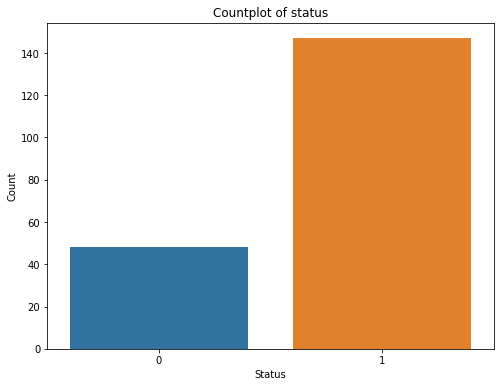

In [13]:
fig = plt.subplots(figsize=(8,6))
sns.countplot(data["Status"])
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Countplot of status")
plt.show()

# Correlation matrix heatmap

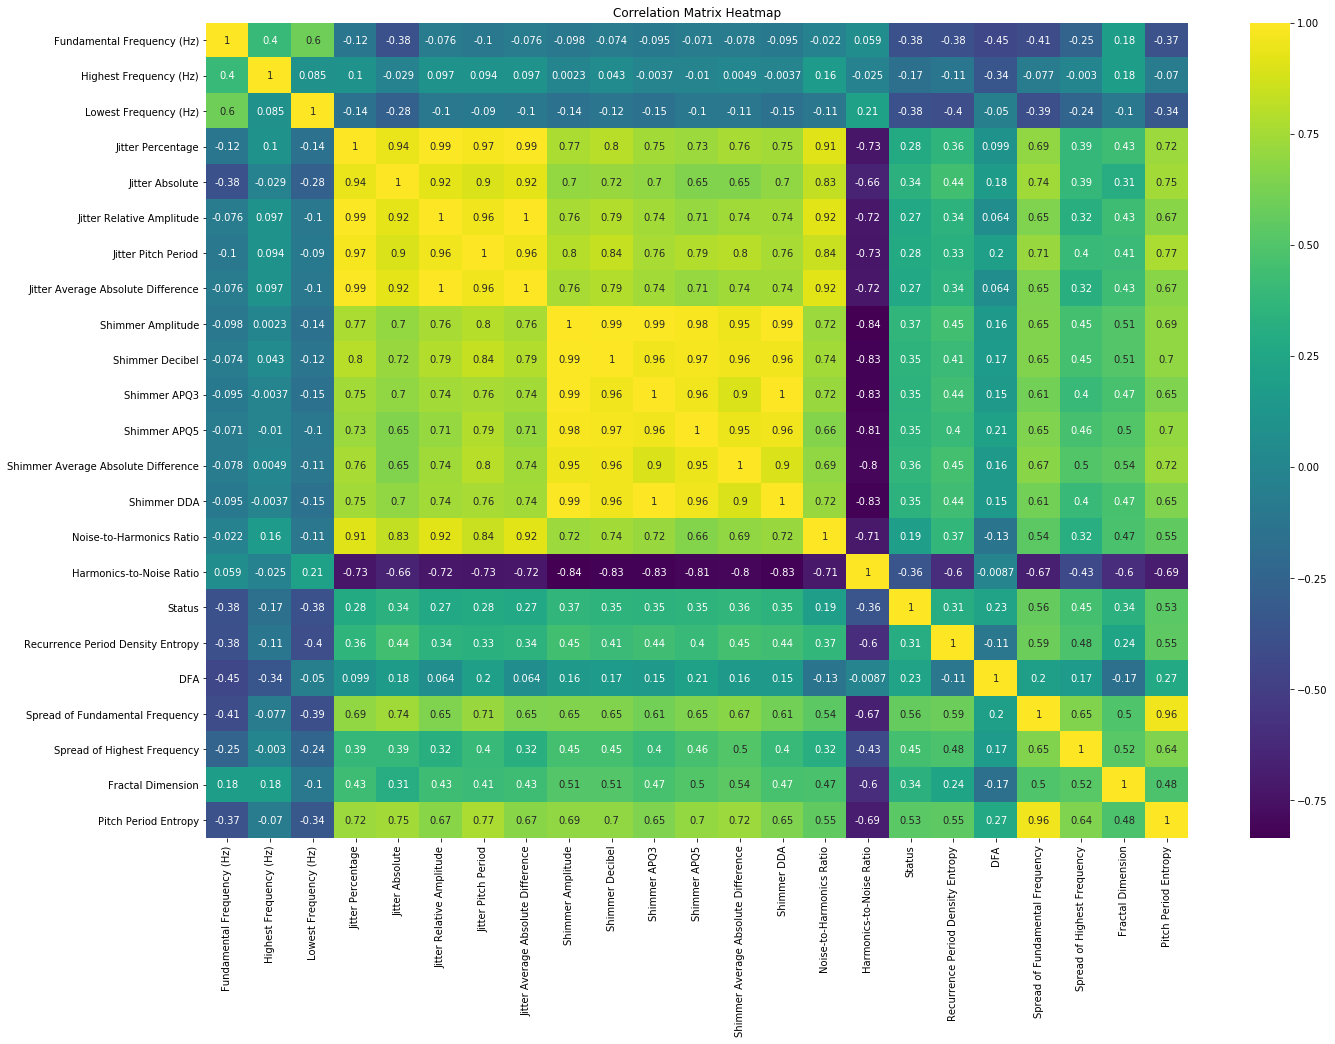

In [14]:
plt.figure(figsize=(22, 15))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Lineplot by class

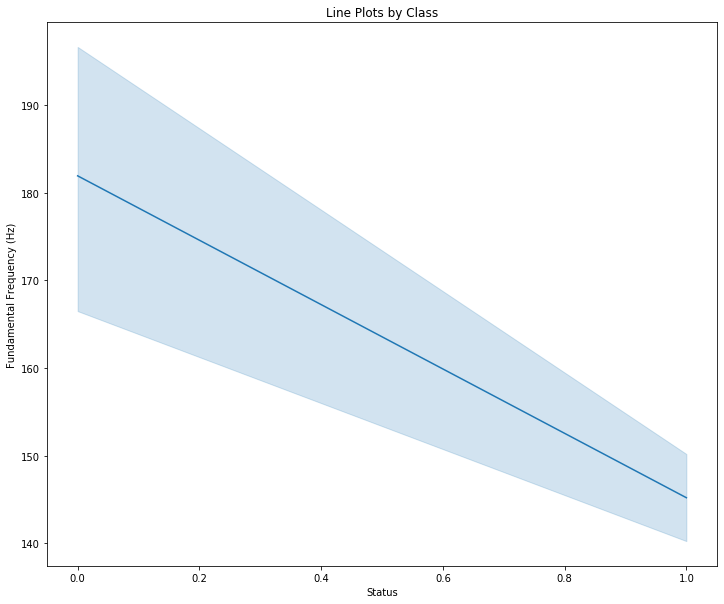

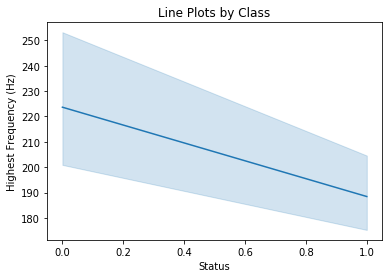

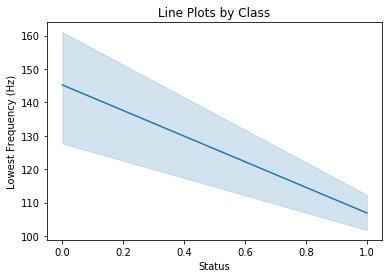

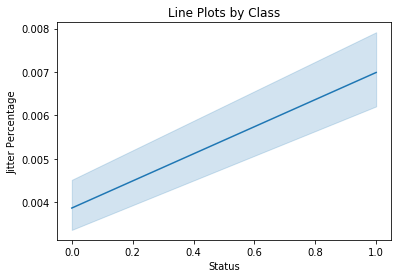

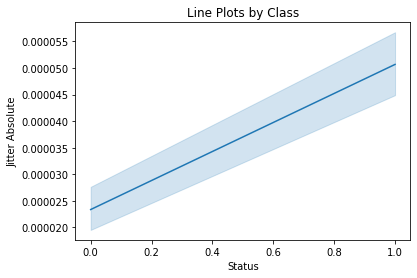

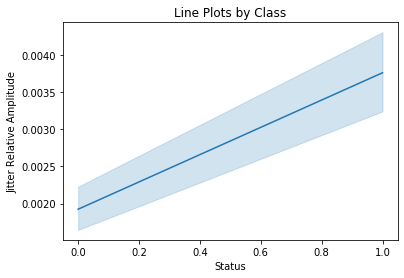

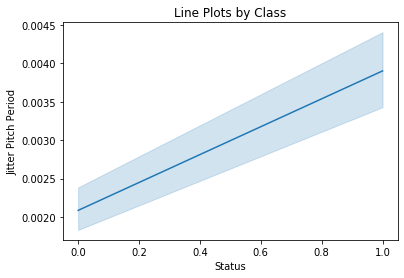

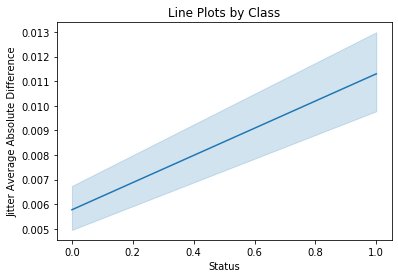

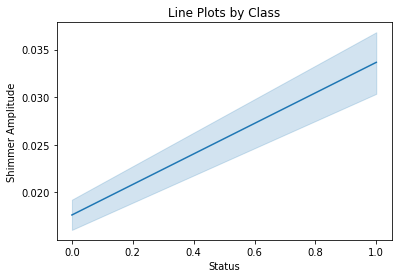

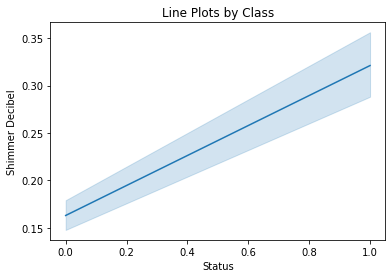

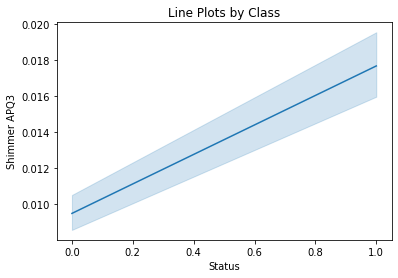

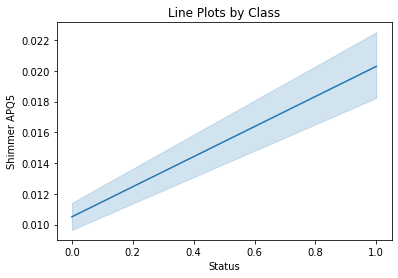

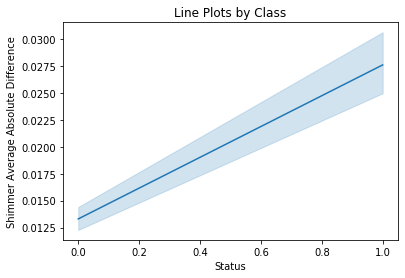

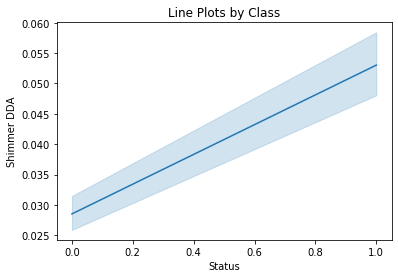

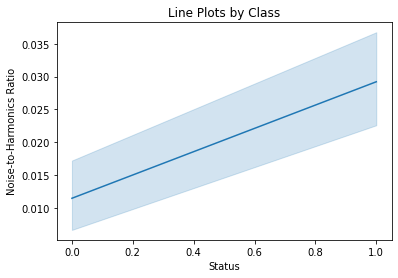

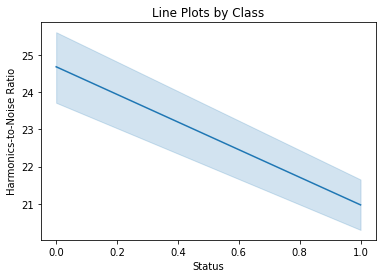

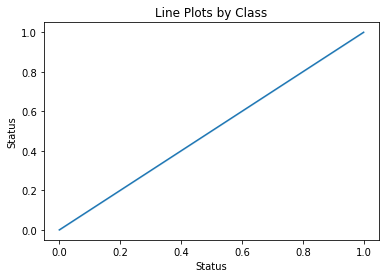

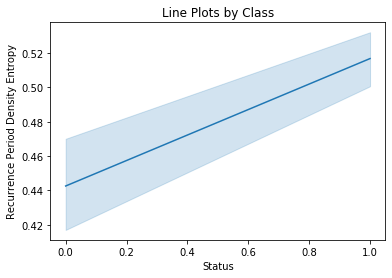

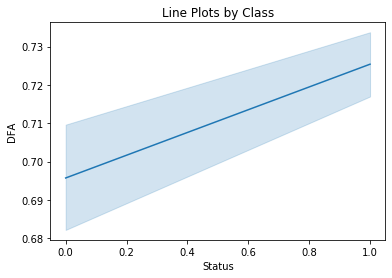

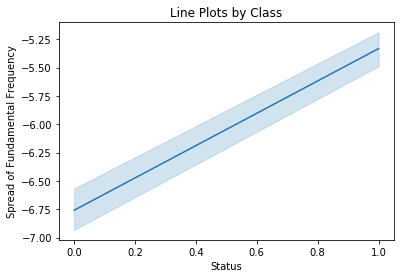

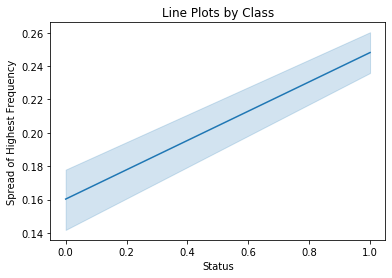

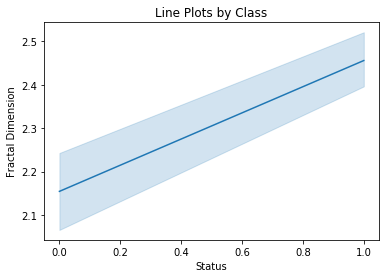

In [15]:
plt.figure(figsize=(12, 10))
for column in data.columns[:-1]:
    sns.lineplot(data=data, x='Status', y=column)
    plt.title('Line Plots by Class')
    plt.xlabel('Status')
    plt.ylabel(column)
    plt.show()

# Separate X and Y

In [16]:
X = data.drop("Status", axis=1)
y = data["Status"]

# Split the data into training and testing sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Boxplot By class after splitting

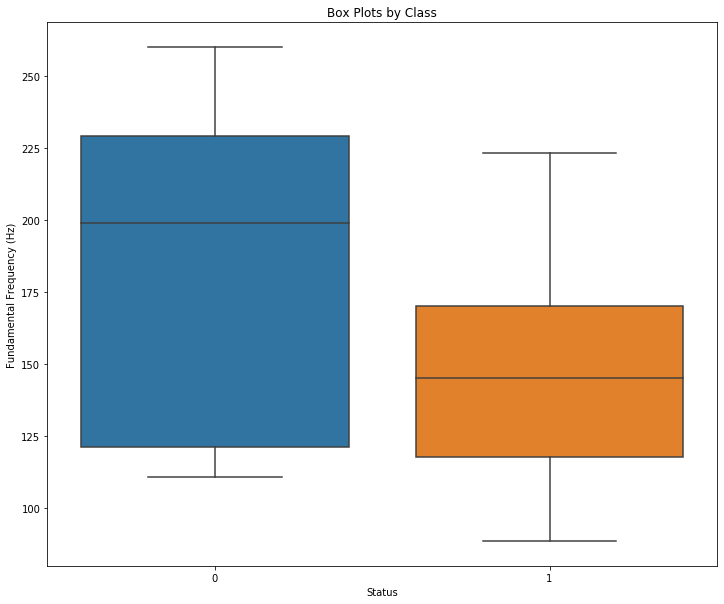

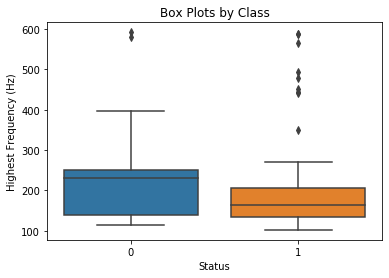

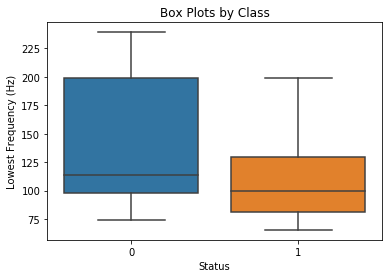

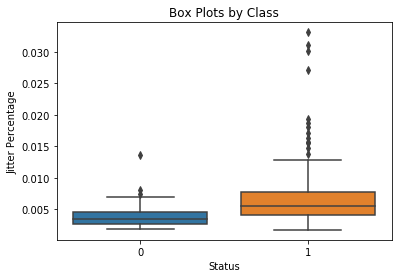

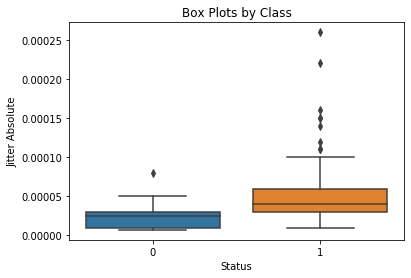

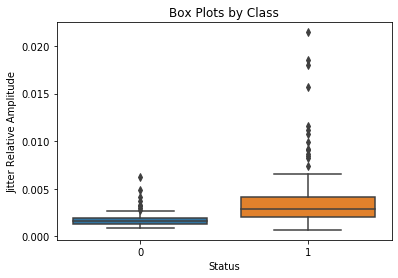

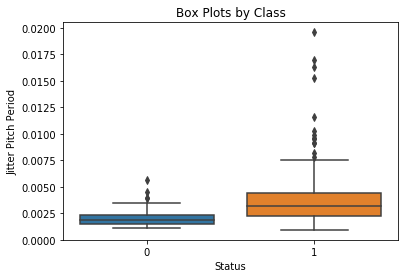

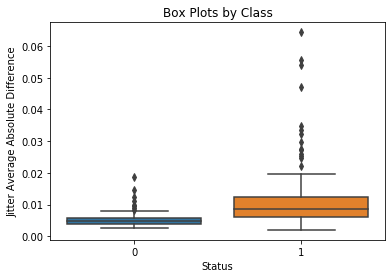

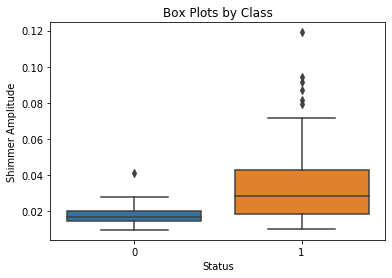

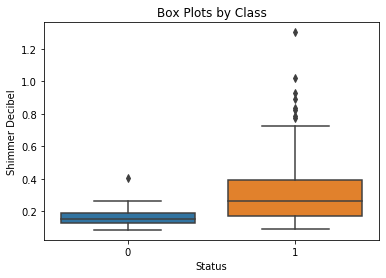

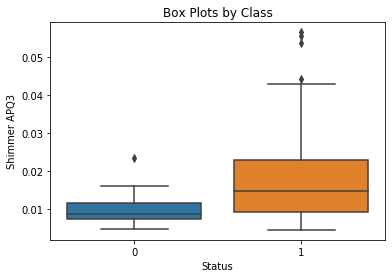

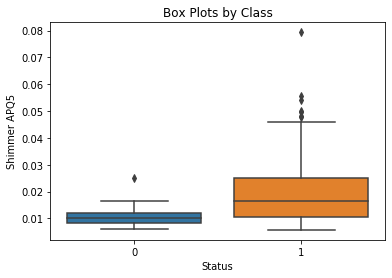

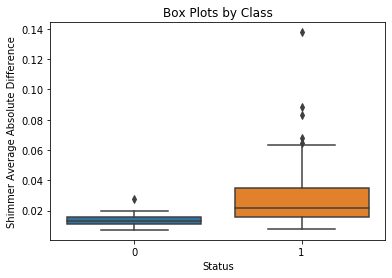

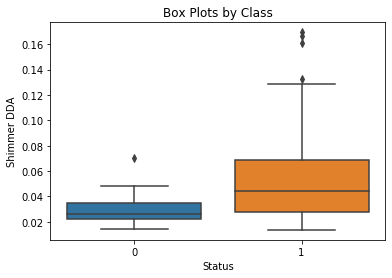

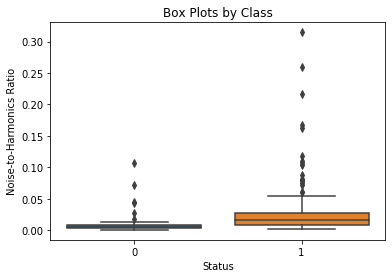

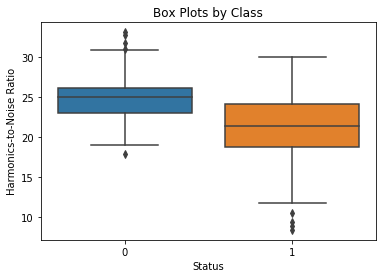

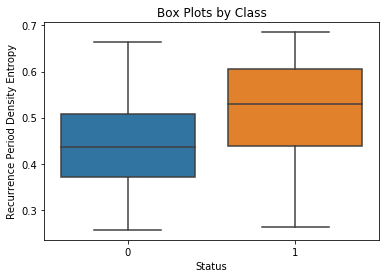

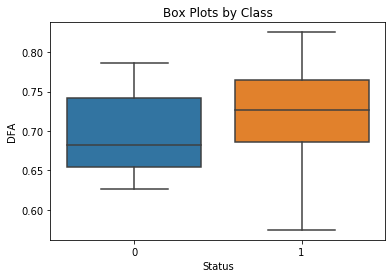

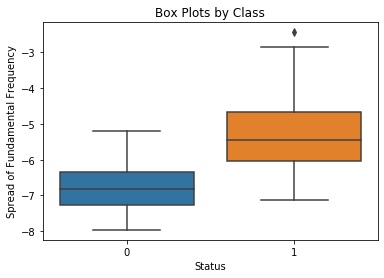

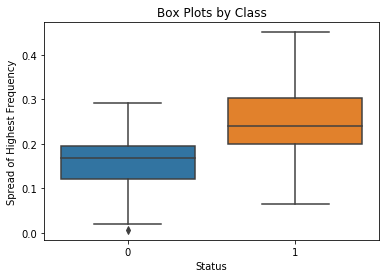

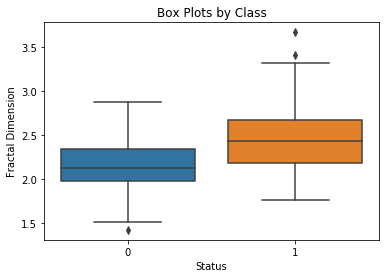

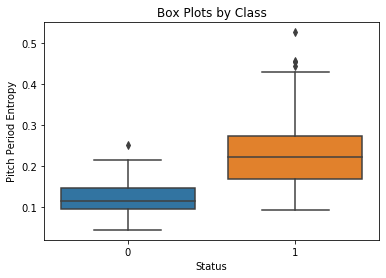

In [18]:
plt.figure(figsize=(12, 10))
for column in X.columns:
    sns.boxplot(data=data, x='Status', y=column)
    plt.title('Box Plots by Class')
    plt.xlabel('Status')
    plt.ylabel(column)
    plt.show()

# Create an imputer to replace missing values with the mean

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [20]:
X_train = imputer.fit_transform(X_train)

# Scaling the features

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform feature selection

In [22]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Create a pipeline with a scaler and classifiers

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])


In [24]:
pipeline_lr

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [25]:
pipeline_rf

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [26]:
pipeline_nb

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [27]:
pipeline_dt

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

# Fit the pipelines to the training data

In [28]:
pipeline_lr.fit(X_train_selected,y_train)
pipeline_rf.fit(X_train_selected,y_train)
pipeline_dt.fit(X_train_selected,y_train)
pipeline_nb.fit(X_train_selected,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

# Predict the target variable for the testing data

In [29]:
y_pred_lr = pipeline_lr.predict(X_test_selected)
y_pred_lr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [30]:
y_pred_rf = pipeline_rf.predict(X_test_selected)
y_pred_rf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [31]:
y_pred_dt = pipeline_dt.predict(X_test_selected)
y_pred_dt

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [32]:
y_pred_nb = pipeline_nb.predict(X_test_selected)
y_pred_nb

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

# Evaluate the models

In [33]:
from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(y_pred_lr,y_test)
accuracy_lr

0.8974358974358975

In [34]:
accuracy_rf = accuracy_score(y_pred_rf,y_test)
accuracy_rf

0.8974358974358975

In [35]:
accuracy_dt = accuracy_score(y_pred_dt,y_test)
accuracy_dt

0.8974358974358975

In [36]:
accuracy_nb = accuracy_score(y_pred_nb,y_test)
accuracy_nb

0.7948717948717948

In [37]:
accuracies = [accuracy_lr, accuracy_rf, accuracy_dt, accuracy_nb]
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'GaussianNB']

# Finding the best model

In [38]:
best_model = models[accuracies.index(max(accuracies))]

print("Best Model:", best_model)
print("Accuracy:", max(accuracies))

Best Model: Logistic Regression
Accuracy: 0.8974358974358975


# Visualization

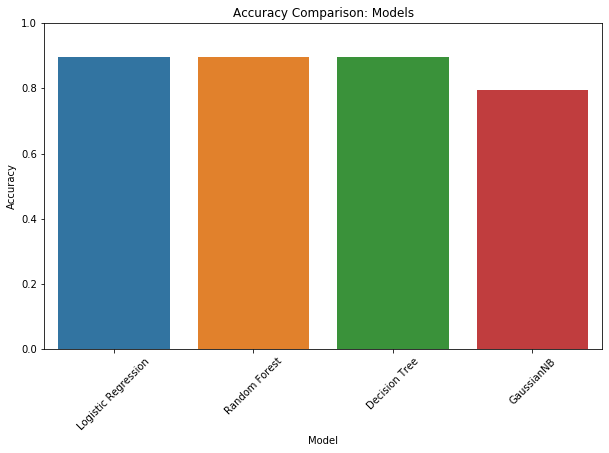

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Accuracy Comparison: Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()